<br><b><span style="font-size: 30px;">Dataset shift in machine learning</span></b>

<b>Problem</b>: training (source) set distribution $p_\text{train}(X, Y)$ can be different from target distribution $p_\text{target}(X, Y)$. How to train the model which is optimal for target distribution? Formally, if $\Theta$ are model parameters and $\mathcal{L}$ is a loss function, we need to find $\Theta^*$ such as:

$$\Theta_* = \arg\!\min_\Theta \mathbb{E}_{p_\text{target}} \mathcal{L} (X, Y; \Theta).$$

This problem is known in the literature as <b><i>dataset shift</i></b>. It has three simplified subclasses:
<ul>
    <li><b><i>covariate shift</i></b> — only the input distribution $p(X)$ changes, while the conditional distribution of the outputs given the inputs $p(Y|X)$ remains unchanged;</li>
    <li><b><i>prior probability shift</i></b> — only the output distribution $p(Y)$ changes, while the conditional distribution of the inputs given the outputs $p(X|Y)$ remains unchanged;</li>
    <li><b><i>concept shift</i></b> — either $P(X)$ stays the same and $p(Y|X)$ changes or $p(Y)$ stays the same and $p(X|Y)$ changes.
</ul>

Note, that there is a large field of research called <b><i>domain adaptation</i></b>, which is essentially associated with covariate (domain) shift. The feature space $\mathcal{X}$ in this case is considered to be the same, only the distributions are different (the difference is subtle and the terminology is inconsistent — <a href="https://stats.stackexchange.com/questions/260272/what-is-difference-between-transfer-learning-and-domain-adaptation">more details</a>).

The subclasses can be conveniently represented via <a href="https://en.wikipedia.org/wiki/Graphical_model">graphical models</a> where $C$ stands for context (for example, training or target):
<table>
    <tr style="background: none;">
        <td>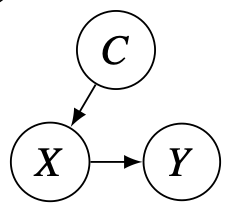</td>
        <td>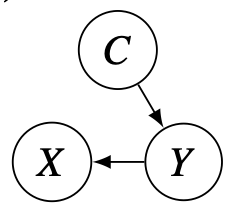</td>
        <td>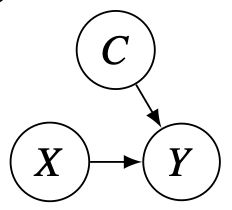</td>
        <td>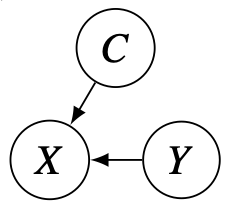</td>
        <td>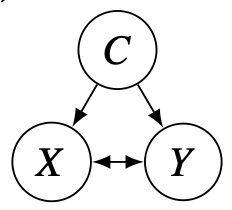</td>
    </tr>
    <tr style="background: none;">
        <td><center>covariate shift</center></td>
        <td><center>prior probability shift</center></td>
        <td><center>concept shift</center></td>
        <td><center>concept shift</center></td>
        <td><center>other types of shifts</center></td>
    </tr>
</table>

Concept shift (as well as more complicated shifts) is intractable without additional considerations (it essentially means, that dependence between $X$ and $Y$ is different in different contexts). In order to identify particular cases <i>Kull et al</i> suggest four types of concept shifts:
<table>
    <tr style="background: none;">
        <td>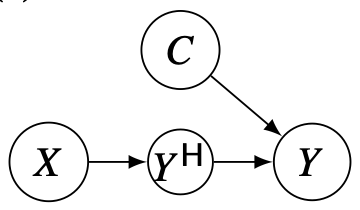</td>
        <td>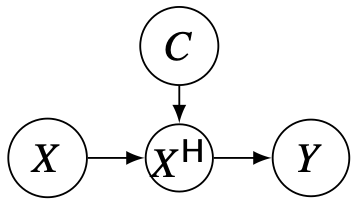</td>
        <td>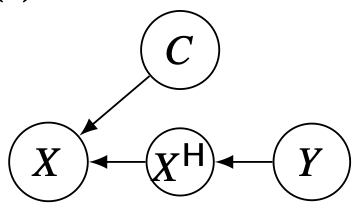</td>
        <td>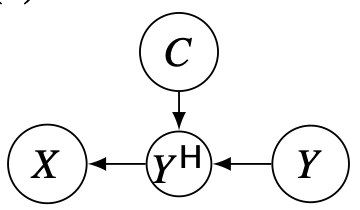</td>
    </tr>
    <tr style="background: none;">
        <td><center>prior probability observation shift</center></td>
        <td><center>covariate hidden shift</center></td>
        <td><center>covariate observation shift</center></td>
        <td><center>prior probability hidden shift</center></td>
    </tr>
</table>

Examples from <i>Kull et al</i>:<br>
<ul>
    <li><b><i>prior probability observation shift</i></b>. Consider a classification problem without any dataset shift between training and testing. Suppose we add noise to the labels in the training data, for instance by assigning a random class to every third training instance. This task now becomes an example of concept shift of type $X \to Y$. Indeed, the distribution of $X$ remains the same regardless of the context, whereas the conditional distribution of $Y$ given $X$ depends on the context $C$ (with noise in training and without noise in testing). We denote the hidden true label by $Y^\text{H}$</li>
    <li><b><i>covariate hidden shift</i></b>. Consider a model to predict whether a robotic machinery succeeds ($Y = 1$) or fails ($Y = 0$) on a task $X$. Suppose one of the important sensors of the robot is biased in training but gets repaired for testing. This results in concept shift because the success or failure $Y$ does not only depend on the task $X$ only, but also on the bias context $C$. However, if we denote by $X^\text{H}$ the task together with the actual hidden reading of the sensor, then the success or failure becomes independent of the context $C$ given $X^\text{H}$.</li>
    <li><b><i>covariate observation shift</i></b>. Consider a model to recognize which of a predefined set of objects $Y$ is on a photo $X$ taken by a fixed camera. Suppose now a new test context appears where the color adjustment settings of the camera are changed and more photos are taken. This results in concept shift because the objects $Y$ remain the same whereas the photos $X$ get shifted through contexts. We denote the context-invariant hidden raw camera input by $X^\text{H}$.</li>
    <li><b><i>covariate observation shift</i></b>. Consider a model to recognize from blood sample $X$ whether a person is currently infected ($Y = 1$) with a particular virus or not ($Y = 0$). Suppose that in the training population an unknown subset of people have had a contact with the same virus earlier, resulting in no changes in blood sample during new encounter. If the proportion of infected people at the current moment is the same across contexts whereas the proportion of people with earlier infection is different, then this results in concept shift. We denote by $Y^\text{H}$ the random variable which is equal to $1$ if the person is currently infected for the first time and $0$ otherwise. Then the distribution of $X$ given $Y^\text{H}$ is independent of $C$.</li>
<ul>

<b><i>Sampling selection bias</i></b> belongs to <i>other types of shifts</i>. It is a systematic flaw in the process of data collection or labeling

<b>Refereces:</b><br>
M. Kull and P. Flach. <a href="http://dmip.webs.upv.es/LMCE2014/Papers/lmce2014_submission_10.pdf">Patterns of dataset shift</a> (2014) + <a href="http://dmip.webs.upv.es/LMCE2014/Slides/paper10.pdf">presentation by authors</a>.<br>
J. G. Moreno-Torres, T. Raeder, R.Alaiz-Rodrıguez, N. V. Chawla and F. Herrera. A unifying view on dataset shift in classification. <a href="https://rtg.cis.upenn.edu/cis700-2019/papers/dataset-shift/dataset-shift-terminology.pdf">Pattern Recognit.</a> 45(1), 521-530 (2012).

# Reweighting the examples

Main idea: changing distribution is equivalent to reweighting.
$$\Theta_* = \arg\!\min_\Theta \mathbb{E}_{p_\text{target}} \mathcal{L} (X, Y; \Theta) = \arg\!\min_\Theta \mathbb{E}_{p_\text{train}} \frac{p_\text{target} (X,Y)}{p_\text{train} (X,Y)} \mathcal{L} (X, Y; \Theta) \approx \arg\!\min_\Theta \frac{1}{n} \sum_{i=1}^n \underbrace{\frac{p_\text{target} (X, Y)}{p_\text{train} (X,Y)}}_{\omega(X, Y)} \mathcal{L} (X, Y; \Theta).$$

In simple cases:
<ul>
    <li>covariate shift: $\displaystyle \omega(X) = p_\text{target}(X)/p_\text{train}(X)$</li>
    <li>prior probability shift: $\displaystyle \omega(Y) = p_\text{target}(Y)/p_\text{train}(Y)$</li>
    <li>concept shift: $\displaystyle \omega(X, Y) = p_\text{target}(Y|X)/p_\text{train}(Y|X)$ or $\displaystyle \omega(X, Y) = p_\text{target}(X|Y)/p_\text{train}(X|Y)$
</ul>

## Parametric approach

## Discrepancy minimization

We can minimize the discrepancy between weighted train and target distributions $D(\omega, p_\text{train}, p_\text{target})$. However, just minimizing this objective with respect to $\omega$ might cause highly varying or unusually scaled values.  This unwanted behavior can be combated through incorporating a property of the reweighed source distribution:
$$1 = \int \omega(X, Y) p_\text{train} (X, Y) \approx \frac{1}{n} \sum_{i=1}^n \omega(X_i, Y_i), \quad X_i, Y_i \sim p_\text{train} (X, Y).$$
Therefore it is usually formulated as the following optimization problem:
<br>
<center>minimize  $D(\omega, p_\text{train}, p_\text{target})$ subject to $\omega_i \geq 0$, $\;\displaystyle \left|\frac{1}{n} \sum_{i=1}^n \omega_i - 1\right| < \epsilon.$ </center>
Sometimes weights are also restricted with $\omega_i \leq B$.

Dependent on the form of discrepancy estimation, we obtain several methods.

### Kullback-Leibler Divergence (for covariate shift)
$$D_\text{KL} (\omega, p_\text{train}, p_\text{target}) = \int p_\text{target} (X) \log \frac{p_\text{target} (X)}{p_\text{train} (X) \omega (X)} = \int p_\text{target} (X) \log \frac{p_\text{target} (X)}{p_\text{train} (X)} - \int p_\text{target} (X) \log \omega (X)$$

Only the second term needs to be optimized. It can be approximated as
$$\int p_\text{target} (X) \log \omega (X) \approx \frac{1}{m} \sum_{i=1}^m \log \omega (X_i), \quad X_i \sim p_\text{target} (X).$$

The weights can be approximated as an inner product with basis functions $\phi$: $\omega(X) = \alpha^T \phi(X)$. Such procedure is called <i>Kullback-Leibler Importance Estimation Procedure (KLIEP)</i>.

### Least squares discrepancy (for covariate shift):
$$D_\text{LS} (\omega, p_\text{train}, p_\text{target}) = \frac12 \int \left( \omega(X) - \frac{p_\text{target} (X)}{p_\text{train} (X)} \right)^2 p_\text{train} (X) = \frac12 \int \omega^2(X) p_\text{train} (X) - \int \omega(X) p_\text{target} (X) + \frac12 \int \frac{p^2_\text{target} (X)}{p_\text{train} (X)}$$

Only the first two terms needs to be optimized. They can be approximated in the same manner and with the same approximation of weights as in the previous section. The procedure is called <i>Least-Squares Importance Fitting (LSIF)</i>.

### Maximum Mean Discrepancy (MMD) (for covariate shift)
We estimate the difference between distributions due to expectancy of $\phi(X)$:

$$D^2_\text{MMD} (\omega, p_\text{train}, p_\text{test}) = (\mathbb{E}_{p_\text{train}} \phi(X) - \mathbb{E}_{p_\text{target}} \phi(X))^2$$
$$D^2_\text{MMD} (\omega, X, Z) \approx \frac{1}{n^2} \sum_{i, j}^n \omega_i \kappa(X_i, X_j) \omega_j - \frac{2}{mn} \sum_i^n \sum_j^m \omega_i \kappa (X_i, Z_j) + C,$$
where $\kappa$ are the kernel functions and $C$ is constant not relevant to the optimization. Minimization of the MMD with respect to the weights is called <i>Kernel Mean Matching (KMM)</i>.

<b>References:</b><br>
W. M. Kouw and M. Loog. An introduction to domain adaptation and transfer learning. <a href="https://arxiv.org/pdf/1812.11806v2.pdf">arXiv:1812.11806</a> (2019).<br>
A. Gretton, A. Smola, J. Huang, M. Schmittfull, K. Borgwardt and B. Schölkopf. Covariate shift by kernel mean matching. <a href="http://www.acad.bg/ebook/ml/The.MIT.Press.Dataset.Shift.in.Machine.Learning.Feb.2009.eBook-DDU.pdf">Dataset shift in machine learning</a>, 3(4):5 (2009).

# Multi-source domain adaptation (MDA)

Often labeled data may be collected from multiple sources with different distributions. Examples:
<ul>
    <li>Images of numbers from different sources (SVHN, SYN NUMS, MNIST, MNIST-M);</li>
    <li>Images collected from different games (GTA5, RDR2) and real life;</li>
    <li>Search results obtained from different years or different engines.</li>
    <li>Medical images collected with different instruments</li>
</ul>

References:<br>
S. Zhao, B. Li, C. Reed, P. Xu, K. Keutzer. Multi-source domain adaptation in the deep learning era: a systematic survey <a href="https://arxiv.org/pdf/2002.12169.pdf">arXiv:2002.12169v1</a> (2020).